In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/zindi-weekend-vaccine/SampleSubmission.csv
/kaggle/input/zindi-weekend-vaccine/Test.csv
/kaggle/input/zindi-weekend-vaccine/Train.csv


In [2]:
train=pd.read_csv('/kaggle/input/zindi-weekend-vaccine/Train.csv')
test=pd.read_csv('/kaggle/input/zindi-weekend-vaccine/Test.csv')
s=pd.read_csv('/kaggle/input/zindi-weekend-vaccine/SampleSubmission.csv')

In [3]:
train

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.000000
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.000000
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.000000
...,...,...,...,...
9996,IU0TIJDI,Living in a time where the sperm I used to was...,1.0,1.000000
9997,WKKPCJY6,<user> <user> In spite of all measles outbrea...,1.0,0.666667
9998,ST3A265H,Interesting trends in child immunization in Ok...,0.0,1.000000
9999,6Z27IJGD,CDC Says Measles Are At Highest Levels In Deca...,0.0,1.000000


In [4]:
# train.agreement.fillna(1,inplace=True)
# train.append(['RQMQ0L2A','I cannot believe in this day and age some parents could be so oblivious to reality as to not #vaccinate their child. #lawandorderSVU',1,0.666667])

In [5]:
train=train[train.label.isin([0,1,-1])]
train.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [6]:
# pd.DataFrame(,columns=train.columns)

In [7]:
train.append(pd.Series(['RQMQ0L2A','I cannot believe in this day and age some parents could be so oblivious to reality as to not #vaccinate their child. #lawandorderSVU',1,0.666667], index=train.columns ), ignore_index=True)


,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.000000
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.000000
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.000000
...,...,...,...,...
9995,WKKPCJY6,<user> <user> In spite of all measles outbrea...,1.0,0.666667
9996,ST3A265H,Interesting trends in child immunization in Ok...,0.0,1.000000
9997,6Z27IJGD,CDC Says Measles Are At Highest Levels In Deca...,0.0,1.000000
9998,P6190L3Q,Pneumonia vaccine: for women w risk of pulmona...,1.0,0.666667


In [8]:
train['label']=train['label']*train['agreement']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
train.isnull().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

In [10]:
test.iloc[2024]['tweet_id']='E0GRUEO2'
test.iloc[2024]['safe_text']='Dr. JAMES SHANNON'

In [11]:
train.agreement.value_counts()

1.000000    5866
0.666667    3894
0.333333     239
Name: agreement, dtype: int64

In [12]:
test.isnull().sum()

tweet_id     0
safe_text    0
dtype: int64

In [13]:
import re
import nltk
from nltk.corpus import stopwords



from bs4 import BeautifulSoup



def url_to_words(raw_text):
    raw_text=str(raw_text).strip()
    soup = BeautifulSoup(raw_text, 'html.parser')
    raw_text = soup.text
    no_coms=re.sub(r'\.com','',raw_text)
    no_urls=re.sub('https?://www','',no_coms)
    no_urls1=re.sub('https?://','',no_urls)
    try:
        no_encoding=no_urls1.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        no_encoding = no_urls1
    letters_only = re.sub("[^a-zA-Z]", " ",no_encoding) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [14]:
test

,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."
...,...,...
5172,ZXVVNC5O,jenny mccarthy is on new years rockin eve. wha...
5173,ZYIANVI8,Measles reported in Clark Co. for 1st time sin...
5174,ZYITEHAH,<user> issues alert regarding Measles in TX. K...
5175,ZZ3BMBTG,I can't believe people don't vaccinate their k...


In [15]:
df=train[['tweet_id','safe_text','label']].append(test,ignore_index=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [16]:
df

,label,safe_text,tweet_id
0,0.0,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,CL1KWCMY
1,1.0,I'm 100% thinking of devoting my career to pro...,E3303EME
2,-1.0,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",M4IVFSMS
3,-1.0,I mean if they immunize my kid with something ...,1DR6ROZ4
4,0.0,Thanks to <user> Catch me performing at La Nui...,J77ENIIE
...,...,...,...
15171,NaN,jenny mccarthy is on new years rockin eve. wha...,ZXVVNC5O
15172,NaN,Measles reported in Clark Co. for 1st time sin...,ZYIANVI8
15173,NaN,<user> issues alert regarding Measles in TX. K...,ZYITEHAH
15174,NaN,I can't believe people don't vaccinate their k...,ZZ3BMBTG


In [17]:
# df['safe_text'].apply(lambda x: len("".join(_ for _ in x if _=="#"))) 

In [18]:
import string
punctuation=string.punctuation
df['safe_text']=df['safe_text'].astype('category')
df['word_count']=df['safe_text'].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df['safe_text'].str.len()
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['safe_text'].apply(lambda x: avg_word(x))
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['safe_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['numerics'] = df['safe_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['upper'] = df['safe_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['word_density'] = df['char_count'] / (df['word_count']+1)
df['punctuation_count'] = df['safe_text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
df['hastag_count'] = df['safe_text'].apply(lambda x: len("".join(_ for _ in x if _=="#"))) 

In [19]:
df.head()

,label,safe_text,tweet_id,word_count,char_count,avg_word,stopwords,numerics,upper,word_density,punctuation_count,hastag_count
0,0.0,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,CL1KWCMY,15,90,5.066667,0,0,5,5.625000,11,5
1,1.0,I'm 100% thinking of devoting my career to pro...,E3303EME,25,140,4.640000,8,0,1,5.384615,4,0
2,-1.0,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",M4IVFSMS,7,55,7.000000,0,0,6,6.875000,2,1
3,-1.0,I mean if they immunize my kid with something ...,1DR6ROZ4,28,138,3.964286,15,0,2,4.758621,4,0
4,0.0,Thanks to <user> Catch me performing at La Nui...,J77ENIIE,20,106,4.350000,4,1,1,5.047619,8,2


In [20]:
col=['word_count', 'char_count',
       'avg_word', 'stopwords', 'numerics', 'upper', 'word_density',
       'punctuation_count', 'hastag_count']

In [21]:
df_train=df[df.label.isnull()==False]
df_test=df[df.label.isnull()==True]
print(df_train.shape,df_test.shape)

(9999, 12) (5177, 12)


In [22]:
print(df_train['safe_text'].sample(20,random_state=20).values)
df_test['safe_text'].sample(20,random_state=20).values

[I hear <user> on MMR with <user> 😃, Where's <user> "<user> Why you should vaccinat..., <user> Have you seen the research that support..., <user> <user>  1980 had my Son vaccinated.He b..., <user> MADDEN MOBILE COINS FOR SALE FROM A MMR..., ..., People who refuse immunization's for there chi..., Princeton Measles Case Confirmed: A suspected ..., <user> <user>  allergies, asthma, autism, auto..., Disney measles outbreak: Resort asks staff for..., I won't but I could fill my feed with case aft...]
Length: 20
Categories (14584, object): [!!!!! RT <user> Hand-washing could save more l..., " #PTI #ImranKhan <user> \n#MissionImranKhanWa..., " Got That #FOD2 🙌🙌 Make Sure Y'all Hit <user>..., " Vaccine-preventable diseases, such as pertus..., ..., 😷😷😷😷 “<user> Five Disneyland employees have be..., 😻🐶Vaccinations are an important part in ensuri..., 🙌 MT <user> The science is clear: The earth is..., 🚨 LINK IN MY BIO 🚨 Just dropped my 6🙏 cover! Y...]


[Girl fighting for life after measles complicat..., #shutdown and health: #4 CDC will stop funding..., This Vaccine Is Gonna Be The Death Of Me, Great“<user> <user> officials: <user> student ..., To the Parent of the Unvaccinated Child Who Ex..., ..., REAL EYES REALIZE  REAL LIES. The Food, vaccin..., “<user> The science is clear: The earth is rou..., Vaccination story shares spiked during measles..., Parents who don't believe in vaccinating your ..., <user> <user> <user> Totally agree. As a paren...]
Length: 20
Categories (14584, object): [!!!!! RT <user> Hand-washing could save more l..., " #PTI #ImranKhan <user> \n#MissionImranKhanWa..., " Got That #FOD2 🙌🙌 Make Sure Y'all Hit <user>..., " Vaccine-preventable diseases, such as pertus..., ..., 😷😷😷😷 “<user> Five Disneyland employees have be..., 😻🐶Vaccinations are an important part in ensuri..., 🙌 MT <user> The science is clear: The earth is..., 🚨 LINK IN MY BIO 🚨 Just dropped my 6🙏 cover! Y...]

In [23]:
from tqdm import tqdm
tqdm.pandas()
df_train['safe_text']=df_train['safe_text'].progress_apply(url_to_words)
df_test['safe_text']=df_test['safe_text'].progress_apply(url_to_words)

100%|██████████| 9999/9999 [00:05<00:00, 1765.51it/s]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 5177/5177 [00:05<00:00, 932.31it/s] 
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
print(df_train['safe_text'].sample(20,random_state=20).values)
df_test['safe_text'].sample(20,random_state=20).values

['hear mmr' 'vaccinate kids two minutes'
 'seen research supports measles vaccine cure form blood cancer alley'
 'son vaccinated became ill never autistic diagnosis sure still wonder'
 'madden mobile coins sale mmr pro member legit player anyone interested follow n dm thank'
 'measles cases us cases far deaths r u encouraging false hysteria cdcwhistleblower'
 'hope get measles fucking registering wait room fucking joke eat shit comiccon'
 'vaccines lyme diseases way protect get bitten' 'called heard immunity'
 'sight mind rich white folks vaccinating kids makes go'
 'jenny mccarthy slippery new vaccine stance child mind institute goodread'
 'dumbasses measles outbreak'
 'vaccinations singapore hope get typhoid fever singaporebound kendall county health human services'
 'despicable katie couric casts lot jenny mccarthy rest vaccine truthers'
 'get vaccinated folks mother facebook updates detail son tragic death pertussis'
 'people refuse immunization children uneducated especially say h

array(['girl fighting life measles complications please vaccinate children',
       'shutdown health cdc stop funding annual flu vaccine program tracking disease outbreaks people could die',
       'vaccine gonna death',
       'great officials student w measles rode bart last week exposing potentially thousands disease',
       'parent unvaccinated child exposed family measles via',
       'puss haha scared vaccines poor baby spoiled sillykitty spruce avenue pet hospital',
       'measles case confirmed tarrant county texas person flew dfw india via dubai health measles',
       'sb new schools providing immunity liability offering certain elective course effective date emerg',
       'loling sit next anti vaxers call getting vaccines fear mongering hippies become doomsday preppers',
       'man vaccinations debate hysterical many idiots vaccines gave child diabetus lol ok nutbags move island',
       'duval county health department immunization center jacksonville fl',
       'one fi

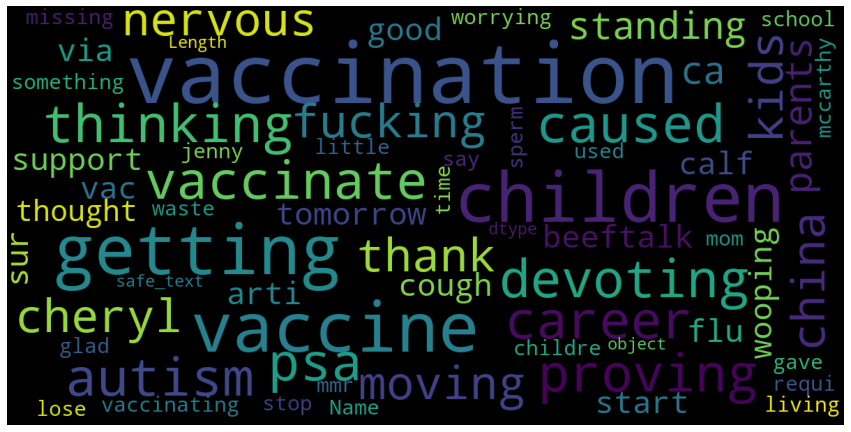

In [25]:
from wordcloud import WordCloud, STOPWORDS
stopwords1 = set(STOPWORDS)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords1,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_train[df_train.label==1]['safe_text'])

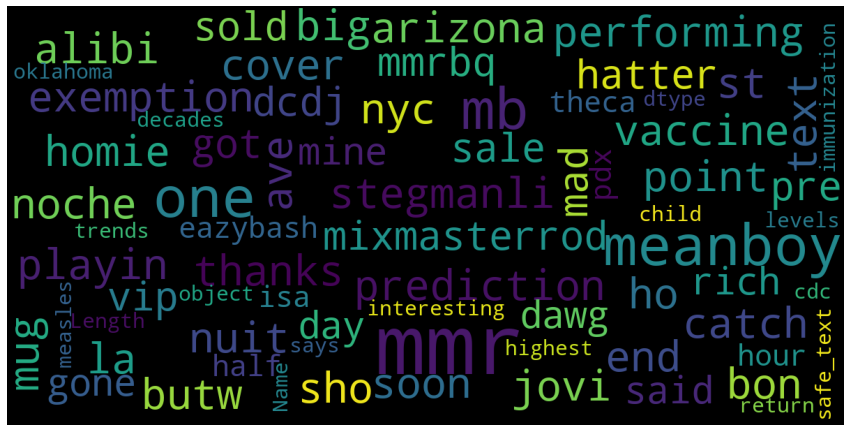

In [26]:
from wordcloud import WordCloud, STOPWORDS
stopwords1 = set(STOPWORDS)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords1,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_train[df_train.label==0]['safe_text'])

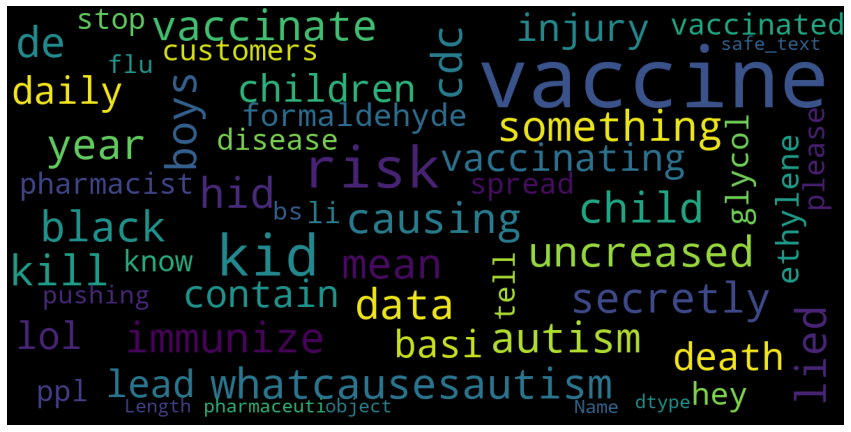

In [27]:
from wordcloud import WordCloud, STOPWORDS
stopwords1 = set(STOPWORDS)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords1,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_train[df_train.label==-1]['safe_text'])

In [28]:
# test[test.safe_text.isnull()==True]

In [29]:
s.iloc[2024]

tweet_id    E0GRUEO2
label              0
Name: 2024, dtype: object

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,f1_score,mean_squared_error
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
v_name = TfidfVectorizer(ngram_range=(1,1),stop_words="english", analyzer='word')
name_tr =v_name.fit_transform(df_train['safe_text'])
name_ts =v_name.transform(df_test['safe_text'])

In [31]:
from scipy.sparse import csr_matrix
from scipy import sparse
final_features = sparse.hstack((df_train[col],name_tr )).tocsr()
final_featurest = sparse.hstack((df_test[col],name_ts)).tocsr()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.metrics import accuracy_score,f1_score,mean_squared_error,mean_squared_log_error,log_loss
X=final_features
# y=pd.get_dummies(train_df['Labels'].values)
y=df_train.label
X_train,X_val,y_train,y_val = train_test_split(X, y, stratify=y, 
                                                  random_state=1994, 
                                                  test_size=0.25, shuffle=True)



In [33]:
y_bin=pd.qcut(df_train.label,3,labels=False)

In [34]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
m=LGBMRegressor(n_estimators=6000,random_state=1994,learning_rate=0.03)
# ,colsample_bytree=0.4,max_depth=-1,boosting='gbdt'
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val.values)], early_stopping_rounds=100,verbose=300,eval_metric='rmse')
p=m.predict(X_val)
print(np.sqrt(mean_squared_error(y_val.values,p)))

Training until validation scores don't improve for 100 rounds
[300]	training's rmse: 0.384378	training's l2: 0.147746	valid_1's rmse: 0.477819	valid_1's l2: 0.228311
Early stopping, best iteration is:
[224]	training's rmse: 0.399983	training's l2: 0.159987	valid_1's rmse: 0.47682	valid_1's l2: 0.227357
0.4768200760835286


In [35]:
from sklearn.model_selection import KFold,StratifiedKFold

errcat = []
y_pred_totcat = []

fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1994)

for train_index, test_index in fold.split(X,y_bin):
    X_train, X_test = X[train_index], X[test_index]
#     X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    cat = LGBMRegressor(n_estimators=6000,random_state=1994,learning_rate=0.03)
    cat.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], verbose=300, early_stopping_rounds=200,eval_metric='rmse')

    y_pred_cat = cat.predict(X_test)
    print("RMSE: ", np.sqrt(mean_squared_error(y_test.values,y_pred_cat)))

    errcat.append(np.sqrt(mean_squared_error(y_test.values,y_pred_cat)))
    p = cat.predict(final_featurest)
    y_pred_totcat.append(p)

Training until validation scores don't improve for 200 rounds
[300]	training's rmse: 0.389811	training's l2: 0.151953	valid_1's rmse: 0.47022	valid_1's l2: 0.221107
Early stopping, best iteration is:
[271]	training's rmse: 0.39519	training's l2: 0.156176	valid_1's rmse: 0.470011	valid_1's l2: 0.220911
RMSE:  0.47001131622480574
Training until validation scores don't improve for 200 rounds
[300]	training's rmse: 0.391397	training's l2: 0.153191	valid_1's rmse: 0.462331	valid_1's l2: 0.21375
Early stopping, best iteration is:
[344]	training's rmse: 0.384106	training's l2: 0.147537	valid_1's rmse: 0.461991	valid_1's l2: 0.213435
RMSE:  0.4619906114700073
Training until validation scores don't improve for 200 rounds
[300]	training's rmse: 0.389873	training's l2: 0.152001	valid_1's rmse: 0.473866	valid_1's l2: 0.224549
Early stopping, best iteration is:
[215]	training's rmse: 0.406623	training's l2: 0.165342	valid_1's rmse: 0.473402	valid_1's l2: 0.22411
RMSE:  0.4734023615409496
Training u

In [36]:
np.mean(errcat)

0.4719064599728613

In [37]:
s['label']=np.mean(y_pred_totcat,0)

In [38]:
s['label'].describe()

count    5177.000000
mean        0.290081
std         0.271268
min        -0.897380
25%         0.071854
50%         0.242413
75%         0.493887
max         1.216124
Name: label, dtype: float64

In [39]:
s.to_csv('kv3.csv',index=False)